# Project

## Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings. filterwarnings('ignore')


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- We have 7043 rows and 21 columns in data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- We have 3 numerical and 18 object columns 
- most of the columns are caregorical

In [5]:
# Total Charges should be numerical coverting that into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- We don't have any null values in data

In [7]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

7814-LEEVE    1
6870-ECSHE    1
1142-WACZW    1
8441-SHIPE    1
5692-FPTAH    1
             ..
0307-BCOPK    1
5536-SLHPM    1
7219-TLZHO    1
8066-POXGX    1
3537-HPKQT    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: in

In [8]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [9]:
# dropping useless columns 
df.drop('customerID',axis=1,inplace=True)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,3257.794122
std,0.368612,24.559481,30.090047,1888.693496
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,1609.000000
50%,0.000000,29.000000,70.350000,3249.000000
75%,0.000000,55.000000,89.850000,4901.500000
max,1.000000,72.000000,118.750000,6530.000000


<AxesSubplot:xlabel='Churn', ylabel='count'>

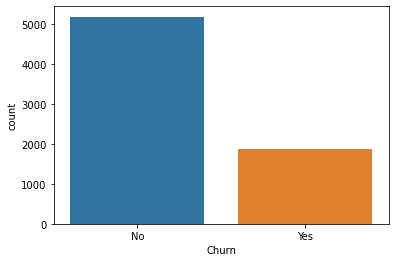

In [11]:
sns.countplot(df['Churn'])

- We can notice data is imbalance, we deal with it

# EDA

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,2505,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1466,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,157,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1400,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,925,Yes


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

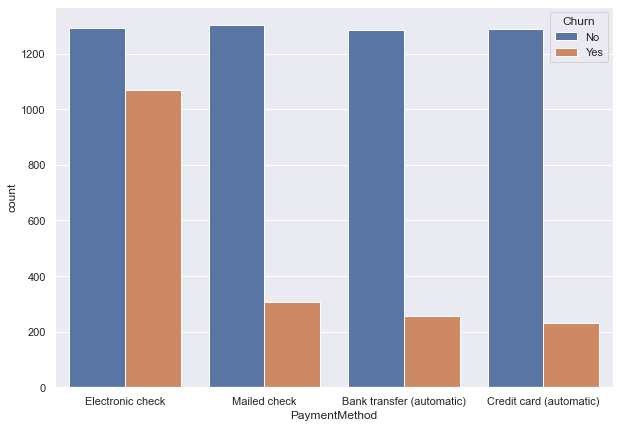

In [13]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaymentMethod',hue='Churn',data= df )

- Here We can notice Churn rate is very high in those are having Electronic check of payment method
- and Its almost equal in other PaymentMethods

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

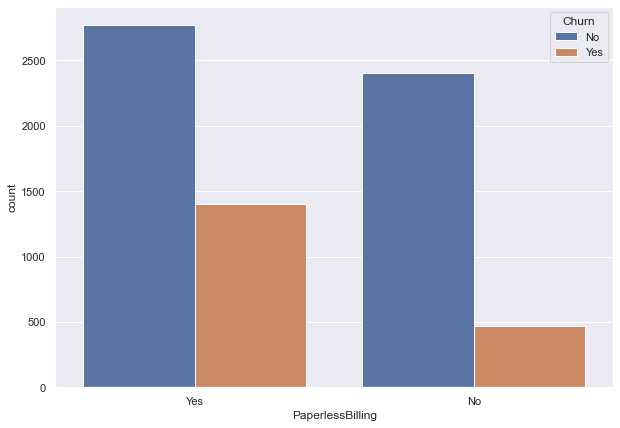

In [14]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaperlessBilling',hue='Churn',data= df )

- We can see here the cx those are having PaperlessBilling, Churn rate is high in them

<AxesSubplot:xlabel='Contract', ylabel='count'>

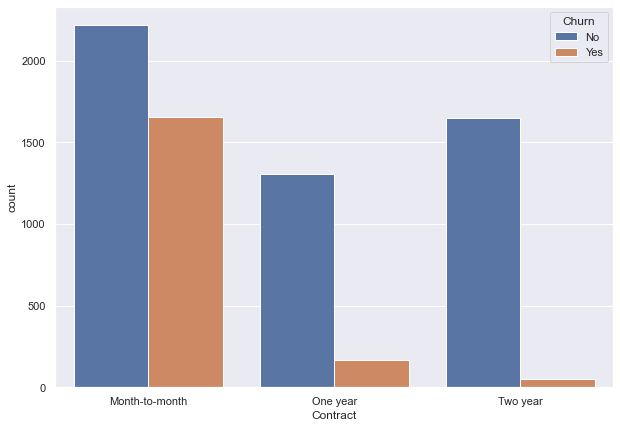

In [15]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Contract',hue='Churn',data= df )

- We can see Churn rate is very high in cx those on Month to Month contract and getting lower when cx taking for long time contract

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

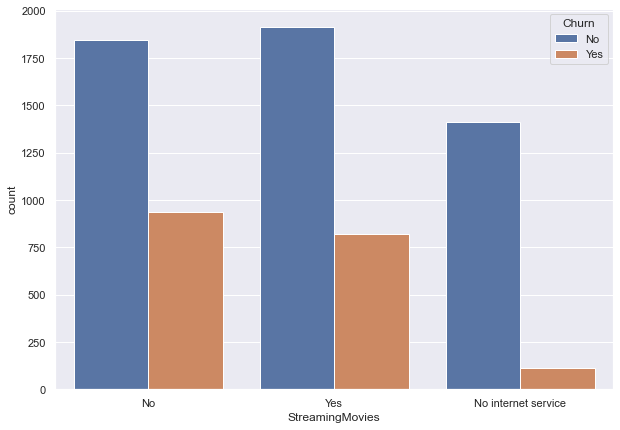

In [16]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingMovies',hue='Churn',data= df )

- In service of StreamingMovies we can also notice cx those are not having, their Churn rate is little high than the cx those are having the service

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

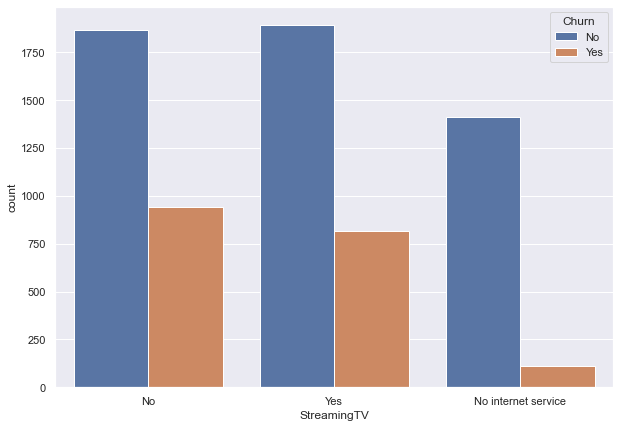

In [17]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingTV',hue='Churn',data= df )

- In The servcie of StreamingTV Churn Rate little more for those not having the service of StreamingTV

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

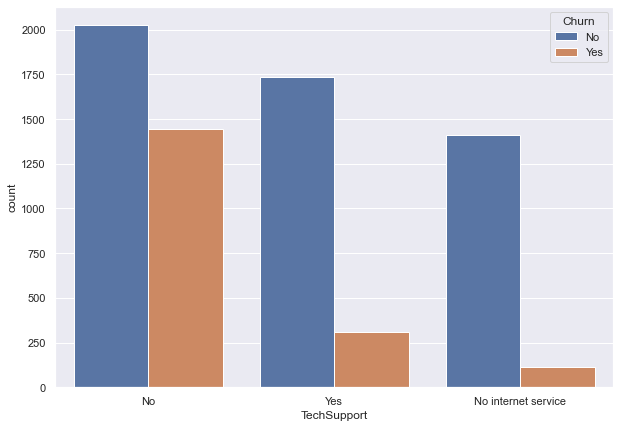

In [18]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='TechSupport',hue='Churn',data= df )

- We can notice churn is very high where cx doesn't have TechSupport 

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

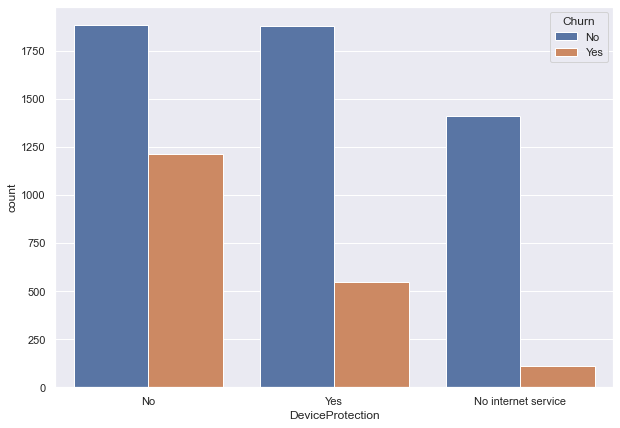

In [19]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='DeviceProtection',hue='Churn',data= df )

- Here we also notice Churn is high where cx is not having Device Protection

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

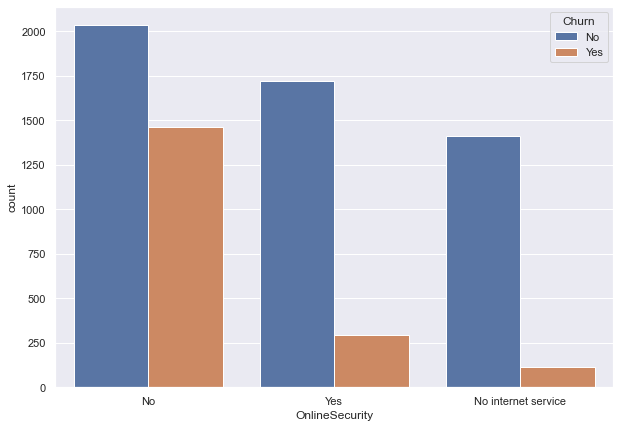

In [20]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OnlineSecurity',hue='Churn',data= df )

- Cx those are not having Online Security, Churn is very high 
- Churn is low where having Online Security and no internet service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

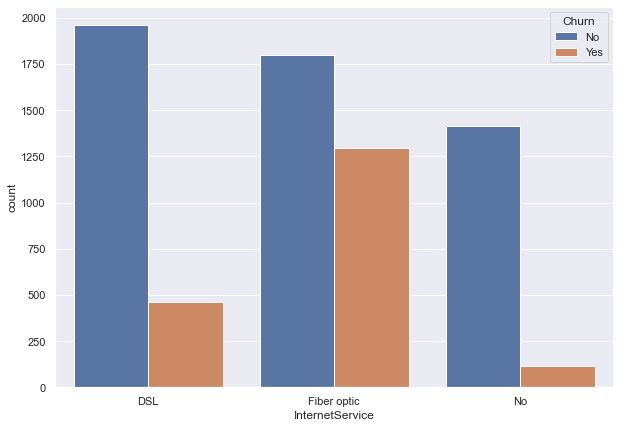

In [21]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='InternetService',hue='Churn',data= df )

- Churn is very high in cx of Fiber Optic Internet service
- Churn is very low where cx doesn't have Internet service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

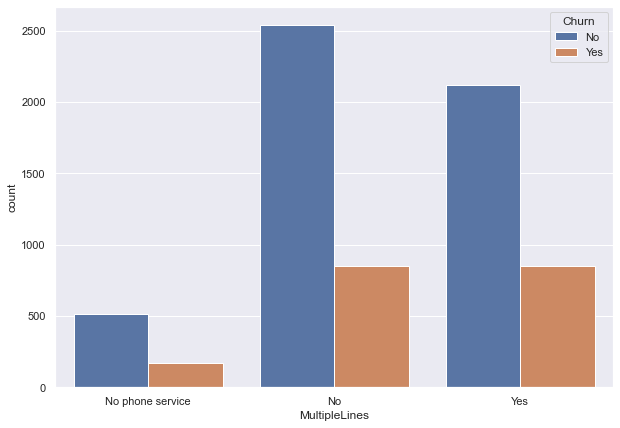

In [22]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='MultipleLines',hue='Churn',data= df )

- Churn Percentage is high where cx having multiple lines 
- There are some cx as well, who doesn't have Phone service

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

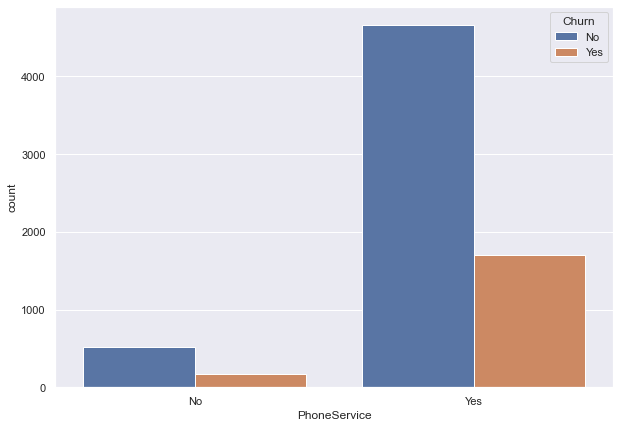

In [23]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PhoneService',hue='Churn',data= df )

- We can see most the cx having PhoneService, few of them not having PhoneService
- Churn is also high in cx having PhoneService

<AxesSubplot:xlabel='tenure', ylabel='count'>

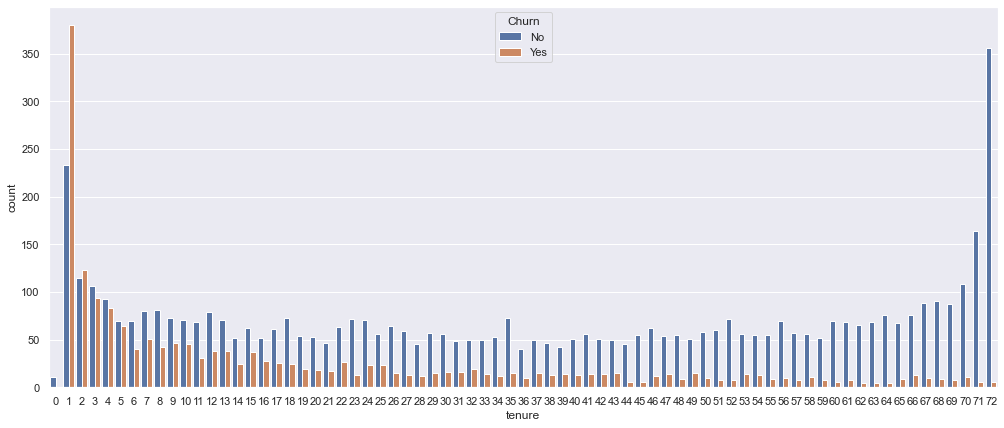

In [24]:
plt.figure(figsize=(17, 7))
sns. set(color_codes=True)
sns.countplot(x='tenure',hue='Churn',data= df )

- Churn is high where tenure is less 
- where tenure is 1 churn very high
- churn is high where tenure is 1 to 6 
- after that where tenure is increasing Churn is decreasing

<AxesSubplot:xlabel='Dependents', ylabel='count'>

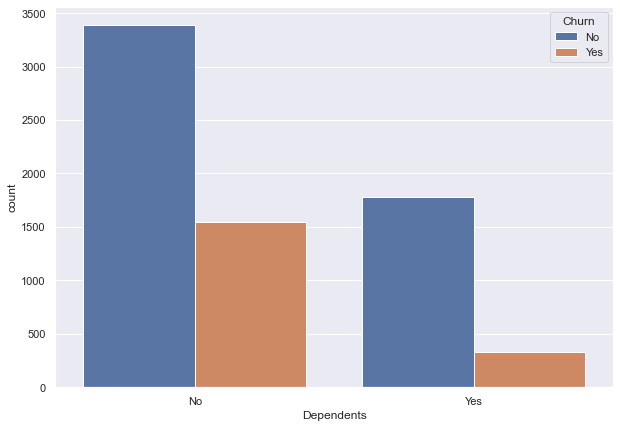

In [25]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Dependents',hue='Churn',data= df )

- We notice we have more cs those don't have dependents.
- Churn is also more in those cx, those not having dependents

<AxesSubplot:xlabel='Partner', ylabel='count'>

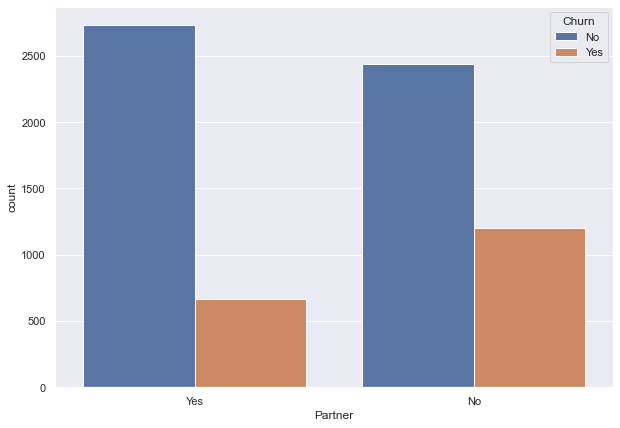

In [26]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Partner',hue='Churn',data= df )

- We can see Churn is less in Partner, more in customer those are not partner

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

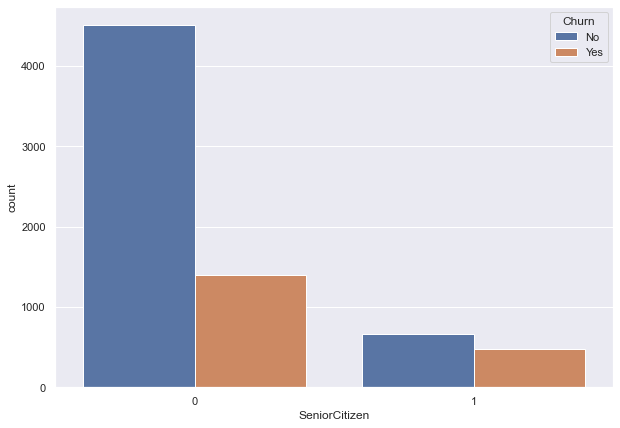

In [27]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='SeniorCitizen',hue='Churn',data= df )

- Churn is less in SeniorCitizen, Must be we have less no customer in seniors

<AxesSubplot:xlabel='gender', ylabel='count'>

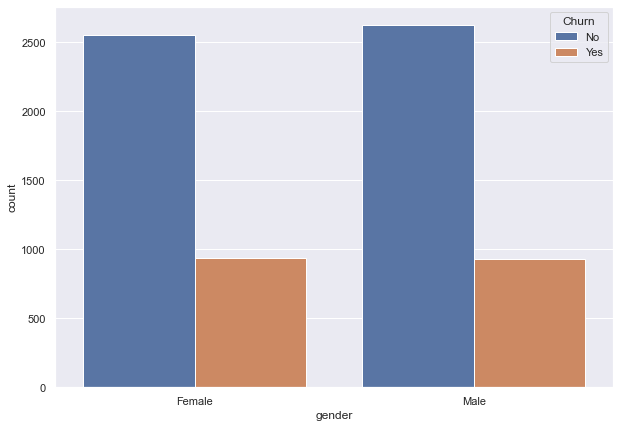

In [28]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='gender', hue='Churn',data= df )

- Churn is almost same in all gender, male and female

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

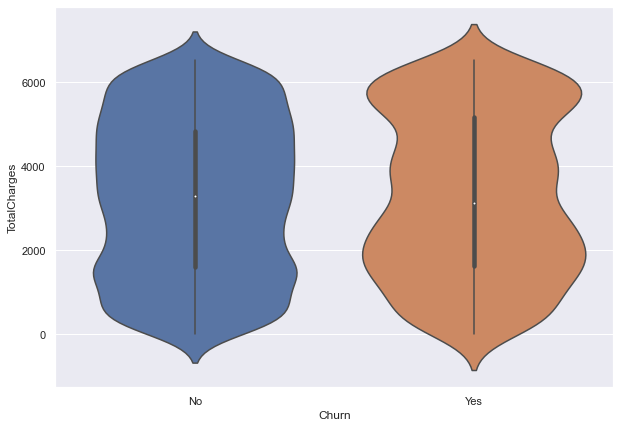

In [29]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='TotalCharges',data=df )

- Churn is little higher in cx those total bill around 2000 and 5800

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

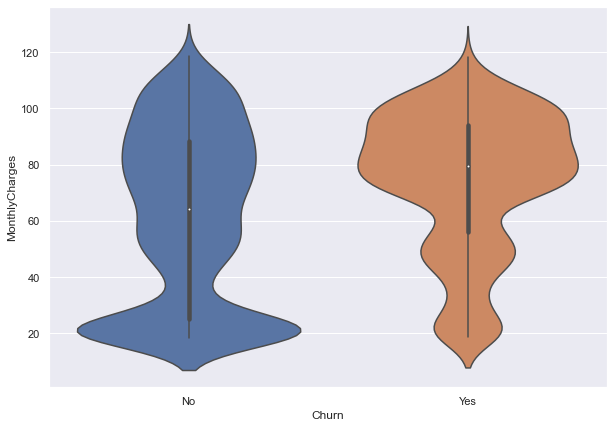

In [30]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='MonthlyCharges',data=df )

- We can notice Churn Rate high in cx their MonthlyCharges are 80 to 100
- Churn is low their monthly Charges are 20 to 60

## Using LabelEncoder for convering categorical to numerical

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
#Encoding object columns into Numeric Values in df_train
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


- All columns are converted into numerical now

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Skewness handling


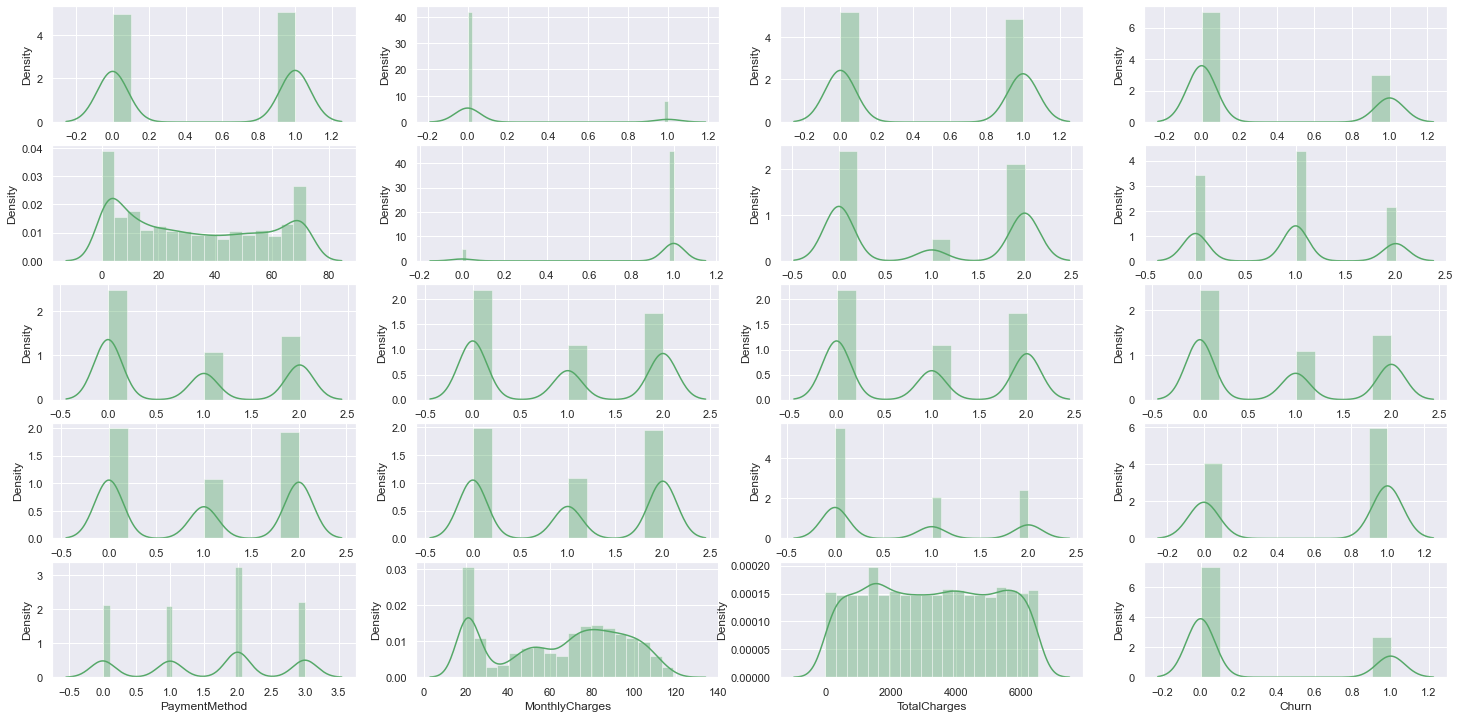

In [36]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [37]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

#### skewness more than+/- 0.5 will we treated  
#### Categorical and Churn columns will no be treated
 
##### will only deal with numercal columns 

# We don't see any skewness in numerical columns
## MonthlyCharges and TotalCharges
### all other columns are categorical

In [38]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

- we can see here skewness is removed from all numerical columns

## Outliers Handling

<AxesSubplot:xlabel='MonthlyCharges'>

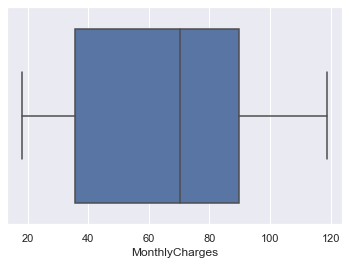

In [39]:
sns.boxplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

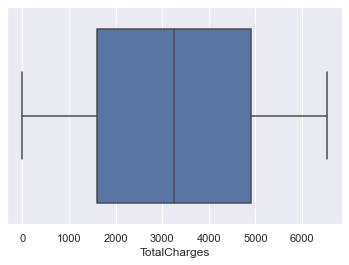

In [40]:
sns.boxplot(df['TotalCharges'])

- We don't see any outliers in numerical columns

# We are dealing with skenwness and outliers in category features 

# Dividing data into X and Y

In [41]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']


In [42]:
x.shape

(7043, 19)

In [43]:
y.shape

(7043,)

### scaling X values


In [44]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [45]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [46]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.470254,0.436462,0.395002,0.453216,0.452222,0.398552,0.492688,0.496237,0.345236,0.592219,0.524776,0.462803,0.498896
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.474277,0.368898,0.429924,0.440081,0.439974,0.430775,0.442501,0.442545,0.416878,0.491457,0.356035,0.299403,0.289233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.171642,0.246401
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.666667,0.518408,0.497550
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.712438,0.750613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### data have been scalled

# Imbalanced learn

Using OverSamling_BorderlineSMOTE
- because there is less data in Churn for yes

<AxesSubplot:xlabel='Churn', ylabel='count'>

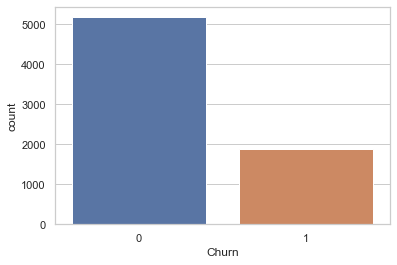

In [47]:
sns.set_style("whitegrid")
sns.countplot(x="Churn", data=df)

In [48]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (7043,)
Resample Target dataset shape (10348,)


<AxesSubplot:xlabel='Churn', ylabel='count'>

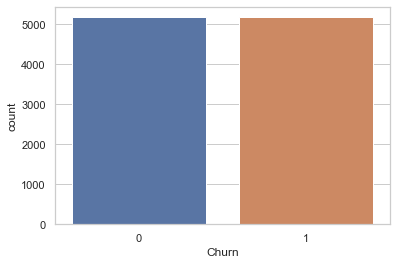

In [49]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

- Now we have balaced data for model training

## Spliting Train and Test data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [52]:
x_train.shape

(7554, 19)

In [53]:
x_test.shape

(2794, 19)

In [54]:
y_train.shape

(7554,)

In [55]:
y_test.shape

(2794,)

 # MODEL BUILDING:

In [56]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### LogisticRegression

In [57]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))


cross validation score: 0.7487433776264759


In [58]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7634216177523264
[[1026  394]
 [ 267 1107]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1420
           1       0.74      0.81      0.77      1374

    accuracy                           0.76      2794
   macro avg       0.77      0.76      0.76      2794
weighted avg       0.77      0.76      0.76      2794

Training accuracy:: 0.7458300238284352
Test accuracy:: 0.7634216177523264


## DECISION TREE CLASSIFIER

In [59]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.7818054417289503


In [60]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.788117394416607
[[1132  288]
 [ 304 1070]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1420
           1       0.79      0.78      0.78      1374

    accuracy                           0.79      2794
   macro avg       0.79      0.79      0.79      2794
weighted avg       0.79      0.79      0.79      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.788117394416607


## KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))


cross validation score for knn: 0.7816030521874555


In [62]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7877594846098783
[[ 934  486]
 [ 107 1267]]
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1420
           1       0.72      0.92      0.81      1374

    accuracy                           0.79      2794
   macro avg       0.81      0.79      0.78      2794
weighted avg       0.81      0.79      0.78      2794

Training accuracy:: 0.8386285411702409
Test accuracy:: 0.7877594846098783


## RandomForestClassifier

In [63]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.8521554672961569


In [64]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.860773085182534
[[1211  209]
 [ 180 1194]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1420
           1       0.85      0.87      0.86      1374

    accuracy                           0.86      2794
   macro avg       0.86      0.86      0.86      2794
weighted avg       0.86      0.86      0.86      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.860773085182534


# ENSEMBLE TECHNIQUES

## 1.ADA BOOST CLASSIFIER

In [65]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))


cross validation score for Ada boost: 0.808376082751661


In [66]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))


0.8239083750894775
[[1104  316]
 [ 176 1198]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1420
           1       0.79      0.87      0.83      1374

    accuracy                           0.82      2794
   macro avg       0.83      0.82      0.82      2794
weighted avg       0.83      0.82      0.82      2794

Training accuracy:: 0.8183743711940694
Test accuracy:: 0.8239083750894775


## 2.BAGGING CLASSIFIER


In [67]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))


cross validation score for BAGGING Classifier: 0.8350536820564572


In [68]:

bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


0.8317823908375089
[[1214  206]
 [ 264 1110]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1420
           1       0.84      0.81      0.83      1374

    accuracy                           0.83      2794
   macro avg       0.83      0.83      0.83      2794
weighted avg       0.83      0.83      0.83      2794

Training accuracy:: 0.9915276674609479
Test accuracy:: 0.8317823908375089


## 3.Gradient Boosting classifier


In [69]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8336968201908073


In [70]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))


0.8418038654259127
[[1151  269]
 [ 173 1201]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1420
           1       0.82      0.87      0.84      1374

    accuracy                           0.84      2794
   macro avg       0.84      0.84      0.84      2794
weighted avg       0.84      0.84      0.84      2794

Training accuracy:: 0.8464389727296796
Test accuracy:: 0.8418038654259127


#### OBSERVATION:
    
    Choosing :
         
              ADA BOOST CLASSIFIER as final model
            
              for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well
        
             Rest of the models having huge difference between train and test accuracies so not considering them.

# HYPER PARAMETER TUNING:

In [71]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200,10],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[10]              
}

In [72]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [73]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Accuracy after parameter tuning:: 0.835361488904796


In [74]:
adb_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 10}

#### model training with best parameters

In [75]:
best_param={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[200],
    'learning_rate':[1.0],
     'random_state':[10]    }  

In [76]:
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [77]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Accuracy after parameter tuning:: 0.835361488904796


#### As we notice after HYPER PARAMETER TUNING models accuracy score got increased 


## Report of AdaBoostClassifier

In [78]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1420
           1       0.82      0.86      0.84      1374

    accuracy                           0.84      2794
   macro avg       0.84      0.84      0.84      2794
weighted avg       0.84      0.84      0.84      2794



<AxesSubplot:>

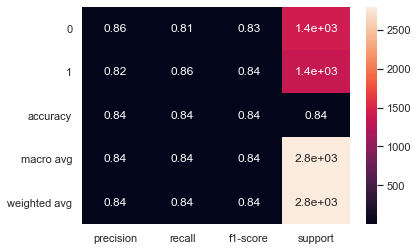

In [79]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [80]:
from sklearn.metrics import roc_auc_score

In [81]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.8357530188408472


In [82]:
from sklearn.metrics import roc_curve

In [83]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

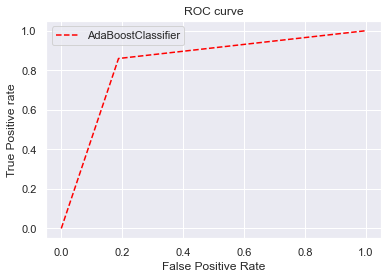

In [84]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [85]:
import joblib

In [86]:
joblib.dump(best_adb_grid.best_estimator_,'CustomerChurnAnalysis.obj')

['CustomerChurnAnalysis.obj']